In [1400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


In [1401]:
#!pip install pycountry-convert
import pycountry_convert as pcc # дописала ко всем пакетам просто

In [1402]:

import plotly.express as px # для визуализации карты мира
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import geopandas as gpd


# Общее
Максимально использовать Pandas и Plotly или Bokeh или GeoPandas (для визуализации карты Мира со странами). Применение излишних циклов ведет к снижению баллов (циклы - ЗЛО). Применение ненужных функций - аналогично. Используйте apply, map и lambda по максимуму. Помним про корректное применение сортировок.

Вспоминаем английский:

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## Задание 1 
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [1403]:
airports = pd.read_csv('csv_airports_v1.csv')
routes = pd.read_csv('csv_routes_v1.csv')

In [1404]:
# display(airports.head())
# routes.head()


## Задание 2. 
1. Вывести `info` по датафреймам.
2. Обратите внимание, что в `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменить их на стандартные `np.nan`
3. Повторно посмотреть `info` по датафреймам.

In [1405]:
#1 
print(airports.info())
print(routes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  7697 non-null   object 
 5   ICAO                  7697 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7697 non-null   object 
 10  DST                   7697 non-null   object 
 11  Tz database timezone  7697 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #

In [1406]:
#2

#print(np.array(airports['Timezone']))  # вывела, чтобы посмотреть как отображается \N как элемент массива
airports = airports.replace('\\N',np.nan)
#display(airports)

In [1407]:
#3
print(airports.info())
print(routes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  6071 non-null   object 
 5   ICAO                  7696 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7344 non-null   object 
 10  DST                   7344 non-null   object 
 11  Tz database timezone  6676 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #

## Задание 3. 
1. Срезать данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, отвяжите новую табличку от `airports`
2. В `iata_arports` добавьте столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии). 

In [1408]:
#1
pd.options.mode.copy_on_write = True   # подумать. мб просто пандас у меня не обновлен. ни наю. но если убрать будет жопка
airports_for_iata = airports.copy()
iata_arports = airports_for_iata.dropna(subset='IATA')


# print(iata_arports.shape)    # проверила не привязлось ли 
# airports.shape  
iata_arports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6071 entries, 0 to 7695
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            6071 non-null   int64  
 1   Name of airport       6071 non-null   object 
 2   City                  6032 non-null   object 
 3   Country               6071 non-null   object 
 4   IATA                  6071 non-null   object 
 5   ICAO                  6071 non-null   object 
 6   Latitude              6071 non-null   float64
 7   Longitude             6071 non-null   float64
 8   Altitude              6071 non-null   int64  
 9   Timezone              5867 non-null   object 
 10  DST                   5867 non-null   object 
 11  Tz database timezone  5514 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 616.6+ KB


In [1409]:
#2
iata_arports.Country.unique()

def country_to_continent(country_name):
    try:
        country_alpha2 = pcc.country_name_to_country_alpha2(country_name)
        country_continent_code = pcc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pcc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None

iata_arports['Continents'] = iata_arports.Country.map(country_to_continent)
# display(iata_arports.head())
display(iata_arports['Continents'].unique())  # смотрим есть ли нон

iata_arports[iata_arports['Continents'].isna()]['Country'].unique()  # вывели те, для которых в функции нет континта. Костыли oh no
# merged[merged['Continent'].isna()].region.unique()


array(['Oceania', 'North America', 'Europe', 'Africa', None,
       'South America', 'Asia'], dtype=object)

array(["Cote d'Ivoire", 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Saint Helena', 'Reunion', 'Midway Islands', 'Antarctica',
       'Virgin Islands', 'Netherlands Antilles', 'Burma', 'East Timor',
       'Johnston Atoll', 'Western Sahara', 'Wake Island'], dtype=object)

In [1417]:
# 2 продолжение

country_dict = {
    "Cote d'Ivoire": 'Africa', 
    'Congo (Brazzaville)' : 'Africa',
    'Congo (Kinshasa)' : 'Africa', 
    'Saint Helena' : 'Africa', 
    'Reunion' : 'Africa', 
    'Midway Islands': 'Oceania',   
    'Antarctica': 'Antarctica', 
    'Virgin Islands': 'North America', 
    'Netherlands Antilles': 'North America', 
    'Burma': 'Asia',
    'East Timor' : 'Asia',
    'Johnston Atoll' : 'Oceania', 
    'Western Sahara': 'Africa',
    'Wake Island': 'Oceania'
    
    }

def country_to_continent_new(country_name):
    try:
        country_alpha2 = pcc.country_name_to_country_alpha2(country_name)
        country_continent_code = pcc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pcc.convert_continent_code_to_continent_name(country_continent_code)
       
        return country_continent_name
    except:
        return country_dict[country_name]


iata_arports['Continents'] = iata_arports['Country'].map(country_to_continent_new)
#iata_arports['Continents'].unique() # проверка на нан ( на всякий)
iata_arports.head()

,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Continents
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,Oceania
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,Oceania
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,Oceania
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,Oceania
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,Oceania


## Задание 4.
Реализовать случайный выбор континента и на карте Мира нанести точки аэропортов `iata_arports` для выбранного континента.

Реализуйте все континенты на отдельных `subplots`.
Нашли обшибки в данных, если да то какие?

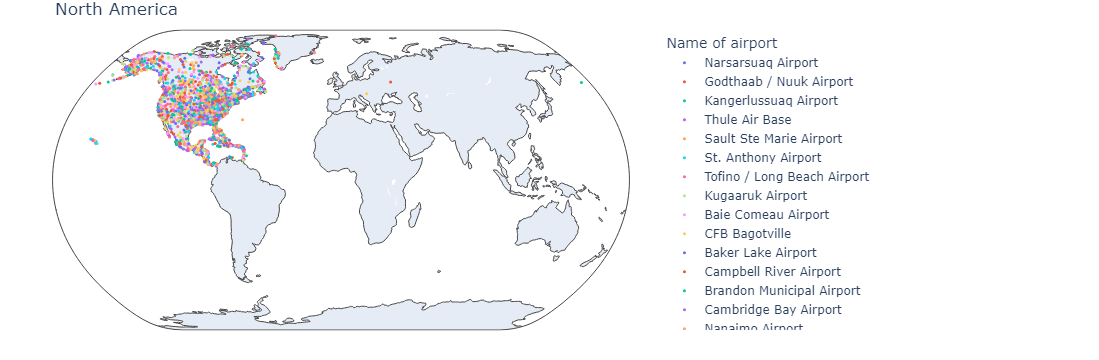

In [1442]:
#1 ( рандомный континент)  
iata_arports_continents = iata_arports['Continents'].unique()

random_continent = iata_arports_continents[np.random.randint(0, len(iata_arports_continents) , 1)][0]
# print(random_continent)
iata_arports[iata_arports['Continents'] == random_continent]

fig=px.scatter_geo(iata_arports[iata_arports['Continents'] == random_continent], lat = 'Latitude', lon = 'Longitude', hover_name = 'Name of airport', color = 'Name of airport',
                        title = str(random_continent), projection = "natural earth")
fig.update_layout(
    margin = dict(l = 30, r = 30, t = 30, b = 30), 
    
)
fig.update_traces(marker=dict(size=3))


fig.show()



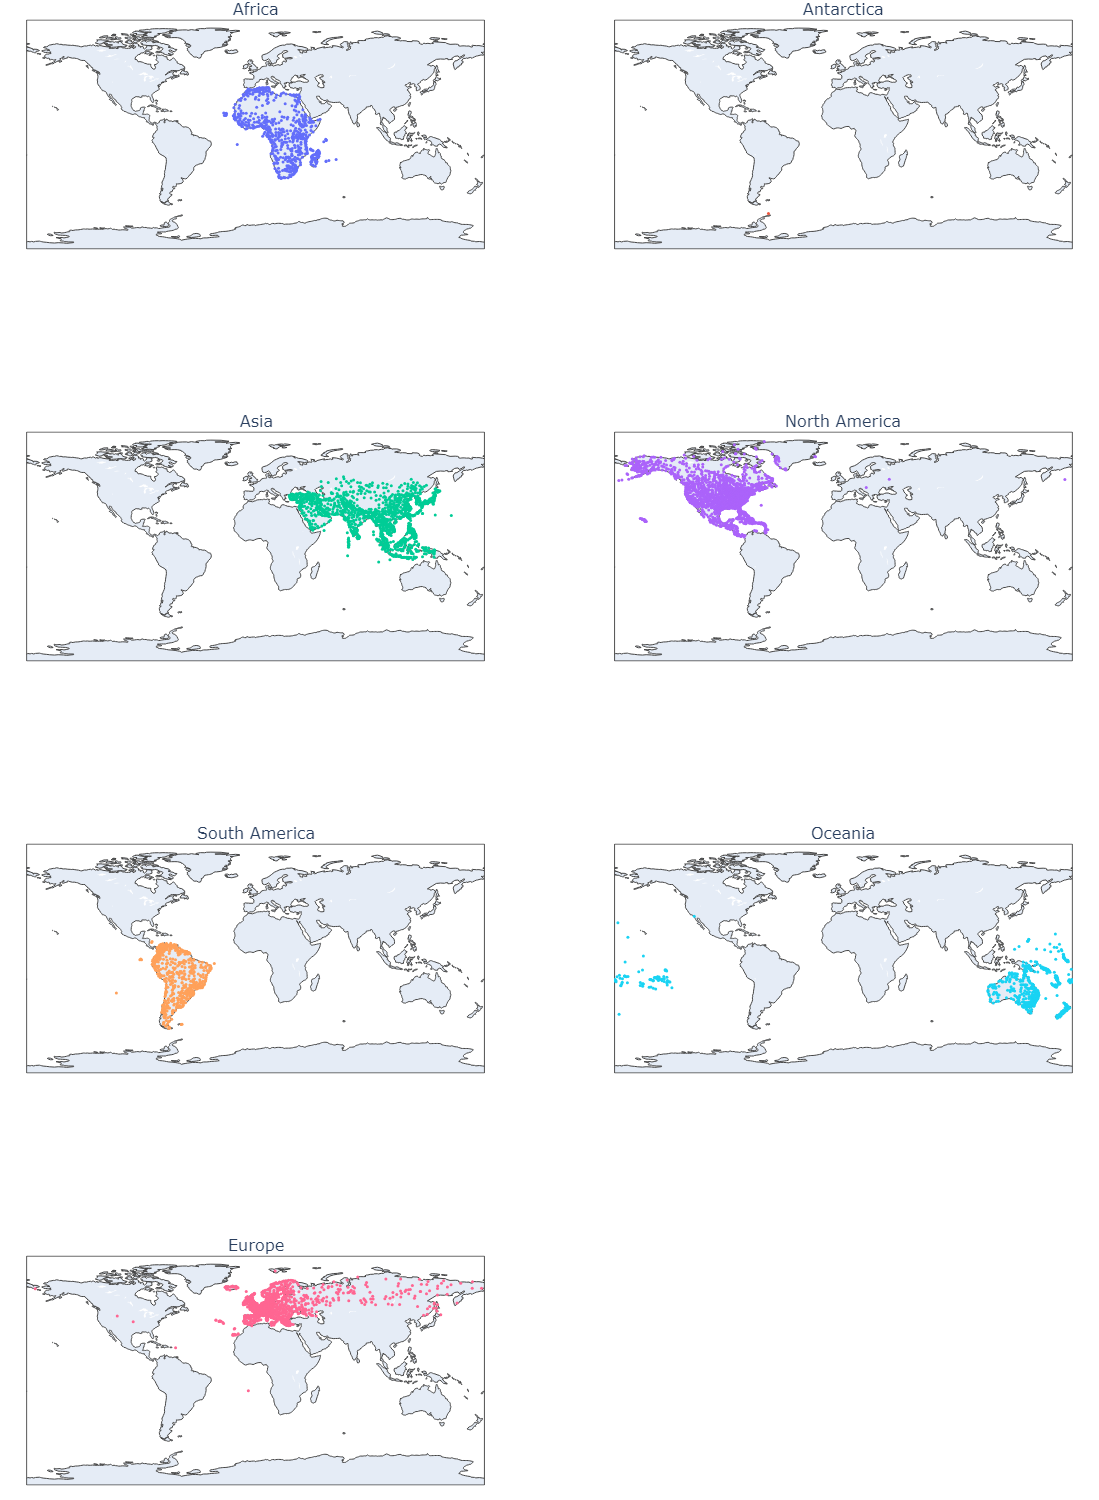

In [1419]:
#2 (все континенты)
def fig_func(cont):
    fig = go.Scattergeo(
            lon =iata_arports[ iata_arports['Continents']==cont]['Longitude'],
            lat = iata_arports[iata_arports['Continents']==cont]['Latitude'],
            text = iata_arports[ iata_arports['Continents']==cont]['Name of airport'],
            mode = 'markers', marker = dict(
            size = 3)
            )
    return fig
fig_7 = make_subplots(rows=4, cols=2,specs=[[{"type": "scattergeo"}, {"type": "scattergeo"}],
                                           [{"type": "scattergeo"}, {"type": "scattergeo"}],
                                           [{"type": "scattergeo"}, {"type": "scattergeo"}],
                                            [{"type": "scattergeo"}, None]],
                                           
                     subplot_titles=( 'Africa','Antarctica', 'Asia', 'North America','South America','Oceania','Europe'))
    

fig_7.add_trace(fig_func('Africa'),row=1, col=1)
fig_7.add_trace(fig_func('Antarctica'),row=1, col=2)
fig_7.add_trace(fig_func('Asia'),row=2, col=1)
fig_7.add_trace(fig_func('North America'),row=2, col=2)
fig_7.add_trace(fig_func('South America'),row=3, col=1)
fig_7.add_trace(fig_func('Oceania'),row=3, col=2)
fig_7.add_trace(fig_func('Europe'),row=4, col=1)
fig_7.update_layout(
    margin = dict(l = 15, r = 15, t = 20 ,b = 15), width=1000,height=1500,showlegend=False
    
)
fig_7.show()


In [1420]:
# Ошибки в данных есть. Некоторые аэропорты находятся не на тех континентах, на которых фактически должны (точнее не в тех странах). Например, на карте Европы некоторые в Северной Америке

## Задание 5.
1. На основе таблиц `iata_arports` и `routes` рассчитать количество взлетов и посадок для каждой страны случайно выбранного континента собрать таблицу: индексы - страна, колонки - взеты и посадки. Упорядочить по названию страны.
2. Используя собранные данные - залить страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет черный или белый цвет (как вам нравится).

In [1432]:
#1

In [1433]:
# выбор рандомного континента
iata_arports_continents = iata_arports['Continents'].unique()
random_continent = iata_arports_continents[np.random.randint(0, len(iata_arports_continents) , 1)][0]

iata_arports_random = iata_arports[iata_arports['Continents'] == random_continent]


In [1434]:
# тут такая же ситуация, как и с аэропортами ( во втором задании просили только их)
routes=routes.replace('\\N',np.nan)
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67662 non-null  object
 1   Airline ID              67183 non-null  object
 2   Source airport          67662 non-null  object
 3   Source airport ID       67442 non-null  object
 4   Destination airport     67662 non-null  object
 5   Destination airport ID  67441 non-null  object
 6   Equipment               67644 non-null  object
dtypes: object(7)
memory usage: 3.6+ MB


In [1435]:

a=pd.Series(np.where(routes['Source airport'].map(len)==3,routes['Source airport'].map(len),np.nan))
a.isna().sum()
#в этих двух строчках я проверила есть ли в сорс эйрпорт 4-буквенные коды икао. Ответ: нет. Значит, можно группировать только по иата

0

In [1436]:
a=pd.Series(np.where(routes['Destination airport'].map(len)==3,routes['Source airport'].map(len),np.nan))
a.isna().sum()
#в этих двух строчках я проверила есть ли в дестинейшон эйрпорт 4-буквенные коды икао. Ответ: нет. Значит, можно группировать только по иата

0

In [1437]:

routes_s_d=routes.copy()
    
iata_arports_random_source = iata_arports_random.merge(routes_s_d['Source airport'],how='left',left_on='IATA',right_on='Source airport')
iata_arports_random_destination = iata_arports_random.merge(routes_s_d['Destination airport'],how='left',left_on='IATA',right_on='Destination airport')

source = pd.pivot_table(iata_arports_random_source,index='Country',values='Source airport',aggfunc=('count')).sort_values(by='Country')
    
    
destination = pd.pivot_table(iata_arports_random_destination,index='Country',values='Destination airport',aggfunc=('count')).sort_values(by='Country')
s_and_d = source.merge(destination,on='Country')
s_and_d = s_and_d.rename(columns={'Source airport':'Sources', 'Destination airport':'Destinations'})

s_and_d

,Sources,Destinations
Country,,
Argentina,255,256
Bolivia,104,105
Brazil,1398,1395
Chile,157,156
Colombia,357,357
Ecuador,97,99
Falkland Islands,1,1
French Guiana,7,7
Guyana,9,9


C:\Users\Larisa\AppData\Local\Temp\ipykernel_19240\3734110345.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



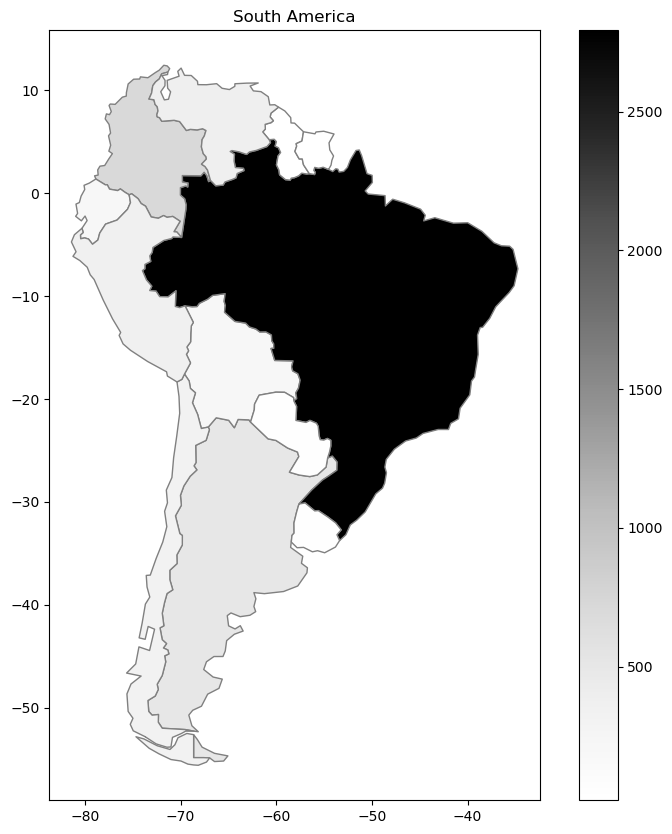

In [1438]:
#2
s_and_d_reset=s_and_d.reset_index()
s_and_d_reset['sum']=s_and_d_reset['Sources']+s_and_d_reset['Destinations']

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
world=world.replace(['United States of America'],['United States'])
continent_draw = world[world["continent"] == random_continent ]

country_draw=continent_draw[continent_draw["name"].isin(s_and_d_reset.Country)].sort_values(by='name')
country_draw=country_draw.merge(s_and_d_reset,left_on='name',right_on='Country')
country_draw.plot(
    ax=ax, column='sum', cmap= 'Greys',
    legend='sum', 
    edgecolor="grey",
    alpha=1
)
ax.set_title(random_continent)

plt.show()


## Задание 6.
Для каждого континента найти 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

Нанести на карту Мира данные аэропорты разным цветом в зависимости от континента.

In [1439]:
#1

continent_for_6=iata_arports.copy()
routes_6=routes.copy()

continent_for_6_source = continent_for_6.merge(routes_6['Source airport'],how='left',left_on='IATA',right_on='Source airport').sort_values(by='Country')
continent_for_6_destination = continent_for_6.merge(routes_6['Destination airport'],how='left',left_on='IATA',right_on='Destination airport').sort_values(by='Country')

continent_for_6_source_p= pd.pivot_table(continent_for_6_source,index='IATA',values='Source airport',aggfunc=('count')).sort_values(by='IATA')
continent_for_6_destination_p = pd.pivot_table(continent_for_6_destination,index='IATA',values='Destination airport',aggfunc=('count')).sort_values(by='IATA')
continent_for_6_s_d_p = continent_for_6_source_p.merge(continent_for_6_destination_p,on='IATA')
continent_for_6_s_d_p['sum'] = continent_for_6_s_d_p['Source airport']+continent_for_6_s_d_p['Destination airport']

continent_for_6_s_d_p_large = continent_for_6_s_d_p.sort_values(by='sum',ascending=False).reset_index()

continent_for_6_s_d_p_large = continent_for_6_s_d_p_large.merge(iata_arports,how='left',on='IATA')



f=lambda x: continent_for_6_s_d_p_large[continent_for_6_s_d_p_large['Continents']==x].head(10).set_index(['Continents','Name of airport'])[['Country','City','IATA','Source airport','Destination airport']]
cont_order = pd.Series(['Africa','Asia','Antarctica','Europe','North America','Oceania','South America'])
cont_order = cont_order.map(f)

top10 = pd.concat([cont_order[0],cont_order[1],cont_order[2],cont_order[3],cont_order[4],cont_order[5],cont_order[6]])
top10 = top10.rename(columns={'Source airport':'Sources', 'Destination airport':'Destinations'})
top10


Country  \
Continents    Name of airport                                                    
Africa        OR Tambo International Airport                      South Africa   
              Cairo International Airport                                Egypt   
              Jomo Kenyatta International Airport                        Kenya   
              Mohammed V International Airport                         Morocco   
              Addis Ababa Bole International Airport                  Ethiopia   
...                                                                        ...   
South America Simón Bolívar International Airport                    Venezuela   
              Comodoro Arturo Merino Benítez International Ai...         Chile   
              Ministro Pistarini International Airport               Argentina   
              Jorge Newbery Airpark                                  Argentina   
              Deputado Luiz Eduardo Magalhães International A...        Brazil   

                                                                          City  \
Continents    Name of airport                                                    
Africa        OR Tambo International Airport                      Johannesburg   
              Cairo International Airport                                Cairo   
              Jomo Kenyatta International Airport                      Nairobi   
              Mohammed V International Airport                      Casablanca   
              Addis Ababa Bole International Airport               Addis Ababa   
...                                                                        ...   
South America Simón Bolívar International Airport                      Caracas   
              Comodoro Arturo Merino Benítez International Ai...      Santiago   
              Ministro Pistarini International Airport            Buenos Aires   
              Jorge Newbery Airpark                               Buenos Aires   
              Deputado Luiz Eduardo Magalhães International A...      Salvador   

                                                                 IATA  \
Continents    Name of airport                                           
Africa        OR Tambo International Airport                      JNB   
              Cairo International Airport                         CAI   
              Jomo Kenyatta International Airport                 NBO   
              Mohammed V International Airport                    CMN   
              Addis Ababa Bole International Airport              ADD   
...                                                               ...   
South America Simón Bolívar International Airport                 CCS   
              Comodoro Arturo Merino Benítez International Ai...  SCL   
              Ministro Pistarini International Airport            EZE   
              Jorge Newbery Airpark                               AEP   
              Deputado Luiz Eduardo Magalhães International A...  SSA   

                                                                  Sources  \
Continents    Name of airport                                               
Africa        OR Tambo International Airport                          159   
              Cairo International Airport                             151   
              Jomo Kenyatta International Airport                     130   
              Mohammed V International Airport                        125   
              Addis Ababa Bole International Airport                  105   
...                                                                   ...   
South America Simón Bolívar International Airport                      90   
              Comodoro Arturo Merino Benítez International Ai...       79   
              Ministro Pistarini International Airport                 75   
              Jorge Newbery Airpark                                    65   
              Deputado Luiz Eduardo Magalhães International A..

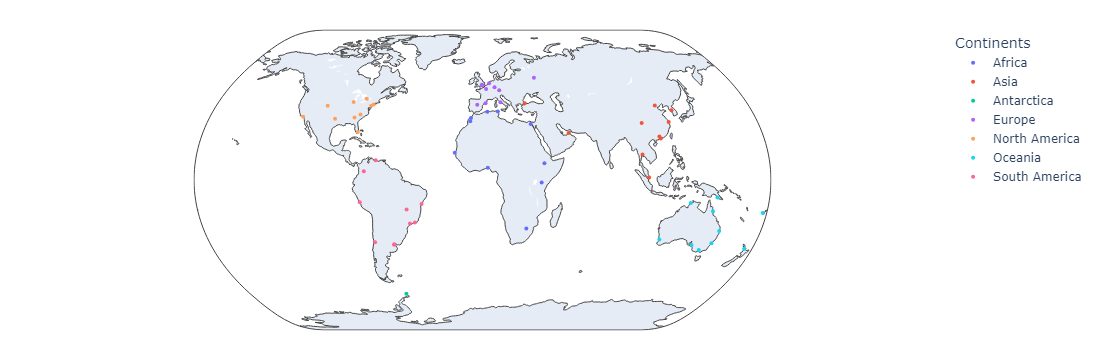

In [1440]:
#2
top10_reset=top10.reset_index()
top10_loc=top10_reset.merge(iata_arports[['IATA','Longitude','Latitude']],on='IATA',how='left')



fig = px.scatter_geo(top10_loc, lat = 'Latitude', lon = 'Longitude',
                     color="Continents",
                     hover_name="Name of airport", 
                     projection="natural earth")
fig.update_layout(
    margin = dict(l = 30, r = 30, t = 30, b = 30), 
    
)
fig.update_traces(marker=dict(size=4))

fig.show()


## Задание 7.
В табличке `csv_routes_v1.csv` есть колонка `Equipment` - это код марки самолета в кодах IATA. Тут есть их расшифровка
https://en.wikipedia.org/wiki/List_of_aircraft_type_designators (если указаны два и более борта, считаем по перевому).

Найдите 10 самых популярных моделей самолетов, естественно с расшифровкой, с указанием количества рейсов выполняемых этими бортами (по числу посадок :)). Результат в виде датафрейма. Индекс номер по порядку, колонки - марка самолета и количество рейсов. Упорядочить от наибольшего количества рейсов вниз. 

In [1441]:
url= 'https://en.wikipedia.org/wiki/List_of_aircraft_type_designators'
transcript = pd.read_html(url)[0][['IATA type code','Model']]

routes_for_7 = routes.copy()

routes_for_7 = routes_for_7.dropna(subset = 'Equipment')

first=lambda x: transcript.Model.iloc[x].split(',')[0]
ax = pd.Series(np.arange(len(transcript.Model)))
ax1 = ax.map(first)
transcript.Model = ax1
second = lambda x: transcript.Model.loc[x].split(' / ')[0]
ax2 = ax.map(second)
transcript.Model = ax2
third = lambda x: transcript.Model.loc[x].split(' | ')[0]
ax3 = ax.map(third)
transcript.Model=ax3
transcript=transcript.drop_duplicates(subset='IATA type code',ignore_index = True)   # например, для ATR могут быть одновременно разные модели. В роутсах нету 1 колонки транскрипта. Предположим, что не различаем тут их

routes_for_70 = routes_for_7.copy()
routes_for_71 = routes_for_7.copy()
routes_for_72 = routes_for_7.copy()

for_equipment1 = lambda x: routes_for_7.Equipment.iloc[x].split(' ')[0]  #0(1) элемент
r = pd.Series(np.arange(len(routes_for_7.Equipment)))
eq0 = r.map(for_equipment1)

routes_for_70.Equipment=eq0

for_equipment2 = lambda x: routes_for_7.Equipment.iloc[x].split(' ')[-1]  #2(3) элемент
r = pd.Series(np.arange(len(routes_for_7.Equipment)))
eq1 = r.map(for_equipment1)

routes_for_71.Equipment = eq1

for_equipment1 = lambda x: routes_for_7.Equipment.iloc[x].split(' ')[len(routes_for_7.Equipment.iloc[x].split(' '))-2]  #1(2) элемент
r = pd.Series(np.arange(len(routes_for_7.Equipment)))
eq2 = r.map(for_equipment1)

routes_for_72.Equipment = eq2

routes_for_7 = pd.concat([routes_for_70,routes_for_71,routes_for_72])
routes_for_7 = routes_for_7.drop_duplicates(ignore_index = True)

routes_7 = routes_for_7.merge(transcript,left_on = 'Equipment',right_on = 'IATA type code',how = 'left')
otvet_7 = pd.DataFrame({'Number': np.arange(1,11)})
model_destinations = routes_7.groupby('Model')['Destination airport'].count().nlargest(10)
model_destinations = pd.DataFrame(model_destinations).reset_index()
otvet_7['Model'] = model_destinations['Model']
otvet_7['Count of destinations'] = model_destinations['Destination airport']


otvet_7.set_index(keys='Number')

,Model,Count of destinations
Number,,
1,Airbus A320,12641
2,Boeing 737-800,8932
3,Airbus A319,5695
4,Boeing 737-800 Winglets,2720
5,Airbus A321,2525
6,Boeing 737-700 Winglets,1964
7,Embraer 190,1514
8,Aerospatiale/Alenia ATR 72-201/-202,1433
9,Airbus A330-300,1295
